# 1.Clone easyocr-finetuning repository 
Clone the github repository.


In [1]:
!git clone https://github.com/vhrehfdl/easyocr_finetuning.git

Cloning into 'easyocr_finetuning'...
remote: Enumerating objects: 4331, done.
remote: Counting objects: 100% (862/862), done.
remote: Compressing objects: 100% (729/729), done.
remote: Total 4331 (delta 131), reused 849 (delta 123), pack-reused 3469
Receiving objects: 100% (4331/4331), 180.13 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (1448/1448), done.
Checking out files: 100% (19078/19078), done.


# 2.Set Environment
If the problem persists even after configuring the environment, click Restart Runtime and try again.

In [2]:
!pip install torch torchvision
!pip install lmdb pillow nltk natsort
!pip install fire
!pip install easyocr
!pip install -U PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=50fc893cd0438a98f8efd818709fa0f7b272928cde873ad1c98ca46f7894aa65
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 19 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 14.5 

# 3.Make train data
To use ai hub data, you only need to use 3-1.   
If there is no ai hub data, use 3-2 to create the data.

## 3-1. Using AI hub OCR data
- https://aihub.or.kr/node/33987
- It uses AI hub OCR data to crop text and transforms the data into a learnable form.

In [3]:
!python /content/easyocr_finetuning/convert_aihub.py \
  --input_image_dir "/content/easyocr_finetuning/workspace/step1/train/aihub_data/images/" \
  --input_label_dir "/content/easyocr_finetuning/workspace/step1/train/aihub_data/label/" \
  --output_dir "/content/easyocr_finetuning/workspace/step2/train/aihub_data/"

In [4]:
!python /content/easyocr_finetuning/convert_aihub.py \
  --input_image_dir "/content/easyocr_finetuning/workspace/step1/validation/aihub_data/images/" \
  --input_label_dir "/content/easyocr_finetuning/workspace/step1/validation/aihub_data/label/" \
  --output_dir "/content/easyocr_finetuning/workspace/step2/validation/aihub_data/"

In [5]:
!python /content/easyocr_finetuning/convert_aihub.py \
  --input_image_dir "/content/easyocr_finetuning/workspace/step1/test/aihub_data/images/" \
  --input_label_dir "/content/easyocr_finetuning/workspace/step1/test/aihub_data/label/" \
  --output_dir "/content/easyocr_finetuning/workspace/step2/test/aihub_data/"

## 3-2. Generate Korean text image
If you do not use AI hub data, you can create your own data.  
If you want to use the data, you can run the collaboratory cell and skip it if you don't want to.

In [6]:
!python /content/easyocr_finetuning/TextRecognitionDataGenerator/trdg/run.py \
  -c 1000 \
  -l ko \
  --output_dir "/content/easyocr_finetuning/workspace/step1/train/kordata"

!python /content/easyocr_finetuning/TextRecognitionDataGeneratortrdg/run.py \
  -c 100 \
  -l ko \
  --output_dir "/content/easyocr_finetuning/workspace/step1/validation/kordata"

!python /content/easyocr_finetuning/TextRecognitionDataGeneratortrdg/run.py \
  -c 100 \
  -l ko \
  --output_dir "/content/easyocr_finetuning/workspace/step1/test/kordata"

100% 1000/1000 [00:01<00:00, 556.75it/s]
python3: can't open file '/content/easyocr_finetuning/TextRecognitionDataGeneratortrdg/run.py': [Errno 2] No such file or directory
python3: can't open file '/content/easyocr_finetuning/TextRecognitionDataGeneratortrdg/run.py': [Errno 2] No such file or directory


In [7]:
!python /content/easyocr_finetuning/TRDG2DTRB/convert.py \
  --input_path "/content/easyocr_finetuning/workspace/step1/train/kordata" \
  --output_path "/content/easyocr_finetuning/workspace/step2/train/kordata"

!python /content/easyocr_finetuning/TRDG2DTRB/convert.py \
  --input_path "/content/easyocr_finetuning/workspace/step1/validation/kordata" \
  --output_path "/content/easyocr_finetuning/workspace/step2/validation/kordata"

!python /content/easyocr_finetuning/TRDG2DTRB/convert.py \
  --input_path "/content/easyocr_finetuning/workspace/step1/test/kordata" \
  --output_path "/content/easyocr_finetuning/workspace/step2/test/kordata"

input path:  /content/easyocr_finetuning/workspace/step1/train/kordata
output path:  /content/easyocr_finetuning/workspace/step2/train/kordata
Total file count:  2000
2000 / 2000 Processing !!
Conversion complete!

input path:  /content/easyocr_finetuning/workspace/step1/validation/kordata
output path:  /content/easyocr_finetuning/workspace/step2/validation/kordata
Total file count:  100
100 / 100 Processing !!
Conversion complete!

input path:  /content/easyocr_finetuning/workspace/step1/test/kordata
output path:  /content/easyocr_finetuning/workspace/step2/test/kordata
Total file count:  100
100 / 100 Processing !!
Conversion complete!



# 4.Transform image and text to data
Only ai hub data is used here.   
(If you want to use the Korean data created in 3-2, combine the folders into one.)

In [8]:
!python /content/easyocr_finetuning/deep-text-recognition-benchmark/create_lmdb_dataset.py \
  --gtFile "/content/easyocr_finetuning/workspace/step2/train/aihub_data/gt.txt" \
  --inputPath "/content/easyocr_finetuning/workspace/step2/train/aihub_data" \
  --outputPath "/content/easyocr_finetuning/workspace/step3/train/aihub_data"

!python /content/easyocr_finetuning/deep-text-recognition-benchmark/create_lmdb_dataset.py \
  --gtFile "/content/easyocr_finetuning/workspace/step2/validation/aihub_data/gt.txt" \
  --inputPath "/content/easyocr_finetuning/workspace/step2/validation/aihub_data" \
  --outputPath "/content/easyocr_finetuning/workspace/step3/validation/aihub_data"

Written 1000 / 1388
Created dataset with 1388 samples
Created dataset with 690 samples


# 5.Fine tuning
Fine tuning proceeds when the cell of the collaboration is executed.
You can check the learning log by looking at the saved_models folder.
When learning is achieved, stop the cell and start the next cell.

In [9]:
!python /content/easyocr_finetuning/deep-text-recognition-benchmark/train.py \
        --train_data "/content/easyocr_finetuning/workspace/step3/train" \
        --valid_data "/content/easyocr_finetuning/workspace/step3/validation" \
        --select_data "/" \
        --batch_ratio 1 \
        --data_filtering_off \
        --sensitive \
        --Transformation None \
        --FeatureExtraction "VGG" \
        --SequenceModeling "BiLSTM" \
        --Prediction "CTC" \
        --input_channel 1 \
        --output_channel 256 \
        --hidden_size 256 \
        --saved_model "/content/easyocr_finetuning/workspace/pre_trained_model/korean_g2.pth" \
        --FT

--------------------------------------------------------------------------------
dataset_root: /content/easyocr_finetuning/workspace/step3/train
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /content/easyocr_finetuning/workspace/step3/train	 dataset: /
sub-directory:	/aihub_data	 num samples: 1388
num total samples of /: 1388 x 1.0 (total_data_usage_ratio) = 1388
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
----------------------

# 6.Apply Fine tuning model to easy ocr 
Import and use the fine tuning model as a custom path.

In [10]:
cp -r /content/saved_models/None-VGG-BiLSTM-CTC-Seed1111/best_accuracy.pth /content/easyocr_finetuning/workspace/user_network_dir/custom.pth

Progress: |██████████████████████████████████████████████████| 100.0% Complete

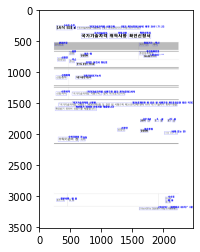

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from easyocr.easyocr import *
from PIL import ImageFont, ImageDraw, Image

# Set GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Using custom model
reader = Reader(['ko'], gpu=True, model_storage_directory='/content/easyocr_finetuning/workspace/user_network_dir', user_network_directory='/content/easyocr_finetuning/workspace/user_network_dir', recog_network='custom')
img_file = "/content/easyocr_finetuning/workspace/demo_page/00110011041.jpg"
result = reader.readtext(img_file)
img    = cv2.imread(img_file)

img = Image.fromarray(img)
font = ImageFont.truetype("/content/easyocr_finetuning/workspace/HMKMRHD.TTF", 35)
draw = ImageDraw.Draw(img)

color = [0, 0, 255]

for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2), y - 20), str(i[1]), font=font, fill=tuple(color),)

plt.imshow(img)
plt.show()
img.save("easyocr_bbox.jpg")

## 7.Evaluation
Performance is measured based on how many cropped images are fitted.

In [12]:
import os
import re
import json
from easyocr.easyocr import *
from PIL import Image
import pandas as pd
import collections

cnt = 0
with open("/content/easyocr_finetuning/workspace/step2/test/ocrdata/gt.txt", "r") as f:
    lines = f.readlines()

origin_text_list = []
text_list = []
answer_list = []
reader = Reader(['ko'], gpu=True, model_storage_directory='/content/easyocr_finetuning/workspace/user_network_dir', user_network_directory='/content/easyocr_finetuning/workspace/user_network_dir', recog_network='custom')

cnt = 0
for i, line in enumerate(lines):
    split_val = line.split("\t")
    image_dir = "/content/easyocr_finetuning/workspace/step2/test/ocrdata/" + split_val[0]
    answer = split_val[1].strip()
    answer = re.sub(r'[^\w\s]', '', answer)

    result = reader.readtext(image_dir)
    if len(result) != 0:
        pred_answer = result[0][1].strip()
        pred_answer = re.sub(r'[^\w\s]', '', pred_answer)
    else:
        pred_answer = ""
    
    origin_text_list.append(answer)
    text_list.append(pred_answer)
    answer_list.append(answer == pred_answer)
    
    if answer == pred_answer: cnt += 1
    if i == 499: break

df_result = pd.DataFrame({"origin_text": origin_text_list, "ocr_text": text_list, "answer": answer_list})
df_result.to_csv("result.csv", index=False, encoding="utf8")
print("\n", collections.Counter(answer_list))


 Counter({True: 316, False: 184})
